### Import Packages

In [81]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Import Data

In [380]:
# Columns are Age, Income, Spending Score
data = np.genfromtxt('./Data/K-Means/mall-customers.csv', delimiter = ',', skip_header = 1, usecols = (2, 3))

scaler = StandardScaler().fit(data)
data = scaler.transform(data)

### Create Distance Functions

In [381]:
def minkowski_dist(x_1, x_2, p):
    return np.sum(np.abs(x_1 - x_2) ** p, axis = 1) ** (1 / p)

def taxicab_dist(x_1, x_2):
    return minkowski_dist(x_1, x_2, 1)

def euclidian_dist(x_1, x_2):
    return minkowski_dist(x_1, x_2, 2)

def chebychev_dist(x_1, x_2):
    return np.max(np.abs(x_1 - x_2))

def canberra_dist(x_1, x_2):
    return np.sum(np.abs(x_1 - x_2) / (np.abs(x_1) + np.abs(x_2)))

### Create Plotting Function

In [382]:
def plot_2d_clusters(data, clusters, centroids, final_iteration):
    if final_iteration:
        plot_color = ['C' + str(c) for c in clusters]
        plt.scatter(data[:, 0], data[:, 1], marker = 'o', linestyle = 'None', color = plot_color)
        plot_color = ['C' + str(i) for i in range(len(centroids))]
        plt.scatter(centroids[:, 0], centroids[:, 1], marker = '^', c = 'black', s = 22 * 4)
    else:
        plot_color = ['C' + str(i) for i in range(len(centroids))]
        plt.scatter(centroids[:, 0], centroids[:, 1], marker = '^', c = 'gray', s = 22 * 4)

### Clustering Algorithm - Step 1

In [383]:
# Step One - Initialize Centroids
def initialize(data, dist_fn, k):
    centroids = data[np.random.choice(data.shape[0], size = k, replace = False), :]
    return centroids

### K-Means++ Initialization - Step 1

In [384]:
def plus_plus_init(data, dist_fn, k):
    centroids = data[np.random.choice(data.shape[0], size = 1, replace = False), :]
    dists = np.zeros(data.shape[0])

    for i in range(k - 1):
        for j in range(data.shape[0]):
            dists[j] = np.min([dist_fn(data[j, :].reshape(1, -1), centroids[c, :].reshape(1, -1))
                               for c in range(centroids.shape[0])])
            probs = dists ** 2 / np.sum(dists ** 2)

        centroids = np.append(centroids, data[np.random.choice(data.shape[0], size = 1, replace = False, p = probs)
                                              , :], axis = 0)

    return centroids

### Clustering Algorithm - Step 2

In [385]:
# Step Two A - Compute Distance to Centroids
def iterate(data, dist_fn, k, centroids):
    iterate = True
    final_iteration = False
    clusters = np.zeros(data.shape[0])

    while iterate:
        dists = np.zeros([data.shape[0], k])
        for i in range(k):
            centroid = centroids[i, :] * np.ones([data.shape[0], centroids.shape[1]])
            dists[:, i] = dist_fn(centroid, data)

        new_clusters = np.argmin(dists, axis = 1)
        if np.all(clusters == new_clusters):
            iterate = False
            final_iteration = True
        clusters = new_clusters

        # Step Two B - Re-Compute Centroids
        for i in range(k):
            centroids[i, :] = np.mean(data[new_clusters == i, :], axis = 0)

    #     plot_2d_clusters(data, new_clusters, centroids, final_iteration)

    #     final_centroids = np.append(centroids, np.unique(clusters , return_counts = True)[1].reshape(-1, 1), axis = 1)

    return (centroids, clusters)

### Combine Steps

In [387]:
def k_means(data, k, dist_fn = euclidian_dist):
    centroids = plus_plus_init(data, dist_fn, k)
    return iterate(data, dist_fn, k, centroids)

### Calculate Within Cluster Sum of Squares

In [386]:
def calc_wcss(data, centroids, clusters):
    css = np.zeros(centroids.shape[0])
    for i in range(centroids.shape[0]):
        cluster_idx = np.where(clusters == i)[0]
        centroid = centroids[i, :] * np.ones([cluster_idx.shape[0], centroids.shape[1]])
        css[i] = np.sum(dist_fn(centroid, data[cluster_idx, :]))
    return np.sum(css)

### Run Algorithms

In [388]:
centroids, clusters = k_means(data, 5)
print(centroids)
print(clusters)

[[-0.05174147  1.5484968 ]
 [ 1.7664858  -0.21631161]
 [-0.71697441  0.40518523]
 [-0.83847416 -1.18190729]
 [ 0.67204379 -0.36671733]]
[3 3 3 3 3 3 3 3 1 3 1 3 4 3 3 3 3 3 4 3 3 3 4 3 4 3 4 3 3 3 1 3 4 3 4 3 4
 3 3 3 1 3 4 3 4 3 4 3 3 3 4 3 3 1 4 4 4 1 3 4 1 3 1 4 1 3 4 1 3 3 1 4 1 1
 1 2 4 4 2 4 1 4 1 4 2 4 4 2 2 4 1 2 4 4 2 2 4 2 4 2 2 4 1 2 4 2 1 4 1 1 1
 2 2 2 2 2 1 4 4 4 2 2 2 2 2 2 4 2 1 2 4 2 2 2 2 2 4 2 2 2 1 2 2 2 2 2 4 2
 2 2 0 2 0 2 4 2 2 2 2 2 1 2 2 2 0 0 0 2 0 2 0 2 0 0 0 2 1 2 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Elbow Method

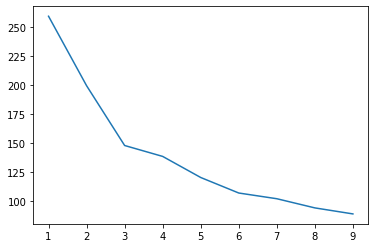

In [389]:
wcss = []
for i in range(1, 10):
    np.random.seed(0)
    centroids, clusters = k_means(data, i)
    wcss.append(calc_wcss(data, centroids, clusters))
    
plt.plot(range(1, 10), wcss)

### Comapre Initialization Methods

[16.84804015]
[29.52868233]


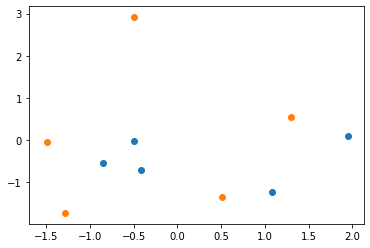

In [422]:
centroids = initialize(data, euclidian_dist, 5)
plt.scatter(centroids[:, 0], centroids[:, 1])
pp_centroids = plus_plus_init(data, euclidian_dist, 5)
plt.scatter(pp_centroids[:, 0], pp_centroids[:, 1])

total_dist = 0
total_pp_dist = 0
for i in range(5):
    for j in range(i, 5):
        total_dist += euclidian_dist(centroids[i, :].reshape(1, -1), centroids[j, :].reshape(1, -1))
        total_pp_dist += euclidian_dist(pp_centroids[i, :].reshape(1, -1), pp_centroids[j, :].reshape(1, -1))
        
print(total_dist)
print(total_pp_dist)